In [58]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder

In [59]:
one_hot_encoder = OneHotEncoder(sparse=False, handle_unknown='error', drop='first')

In [60]:
ct = ColumnTransformer(transformers =[('encoder',one_hot_encoder, [2])], remainder='passthrough')

In [76]:
df = pd.read_csv("./catencoding.csv", header='infer')

In [62]:
ct.fit_transform(df)

array([[0.0, 0.0, 1.0, 0.0, 1200, 25000, 2, 'yes'],
       [0.0, 0.0, 0.0, 0.0, 1495, 40000, 3, 'yes'],
       [0.0, 0.0, 0.0, 1.0, 800, 50000, 1, 'no'],
       [0.0, 0.0, 1.0, 0.0, 2000, 55000, 4, 'yes'],
       [1.0, 0.0, 0.0, 0.0, 1800, 45000, 3, 'no'],
       [0.0, 1.0, 0.0, 0.0, 1000, 25000, 2, 'yes'],
       [0.0, 0.0, 0.0, 1.0, 1200, 60000, 2, 'yes'],
       [0.0, 0.0, 1.0, 0.0, 1200, 35000, 2, 'no'],
       [0.0, 1.0, 0.0, 0.0, 1200, 30000, 1, 'no ']], dtype=object)

In [63]:
CAT_FEATURES = df.select_dtypes(include='object').columns.to_list()

In [64]:
CAT_FEATURES

['city', 'new']

In [65]:
one_hot_transformer = ColumnTransformer(    [("one_hot", one_hot_encoder, CAT_FEATURES)])

In [67]:
one_hot_transformer.fit(df)

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('one_hot',
                                 OneHotEncoder(categories='auto', drop='first',
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='error',
                                               sparse=False),
                                 ['city', 'new'])],
                  verbose=False)

In [68]:
col_names = one_hot_transformer.get_feature_names()

In [69]:
col_names

['one_hot__x0_bangalore',
 'one_hot__x0_chennai',
 'one_hot__x0_hyderabad',
 'one_hot__x0_mumbai',
 'one_hot__x1_no ',
 'one_hot__x1_yes']

In [70]:
X_train_cat = pd.DataFrame(one_hot_transformer.transform(df), 
                           columns=col_names, 
                           index=df.index)

In [71]:
X_train_cat

,one_hot__x0_bangalore,one_hot__x0_chennai,one_hot__x0_hyderabad,one_hot__x0_mumbai,one_hot__x1_no,one_hot__x1_yes
0,0.0,0.0,1.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,1.0
6,0.0,0.0,0.0,1.0,0.0,1.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,1.0,0.0


In [72]:
X_train_ohe = pd.concat([df, X_train_cat], axis=1).drop(CAT_FEATURES, axis=1)

In [73]:
X_train_ohe

,area,rent,rooms,one_hot__x0_bangalore,one_hot__x0_chennai,one_hot__x0_hyderabad,one_hot__x0_mumbai,one_hot__x1_no,one_hot__x1_yes
0,1200,25000,2,0.0,0.0,1.0,0.0,0.0,1.0
1,1495,40000,3,0.0,0.0,0.0,0.0,0.0,1.0
2,800,50000,1,0.0,0.0,0.0,1.0,0.0,0.0
3,2000,55000,4,0.0,0.0,1.0,0.0,0.0,1.0
4,1800,45000,3,1.0,0.0,0.0,0.0,0.0,0.0
5,1000,25000,2,0.0,1.0,0.0,0.0,0.0,1.0
6,1200,60000,2,0.0,0.0,0.0,1.0,0.0,1.0
7,1200,35000,2,0.0,0.0,1.0,0.0,0.0,0.0
8,1200,30000,1,0.0,1.0,0.0,0.0,1.0,0.0


In [77]:
from sklearn.impute import SimpleImputer

In [78]:
import missingno

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
area     9 non-null int64
rent     8 non-null float64
city     9 non-null object
rooms    9 non-null int64
new      9 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 352.0+ bytes


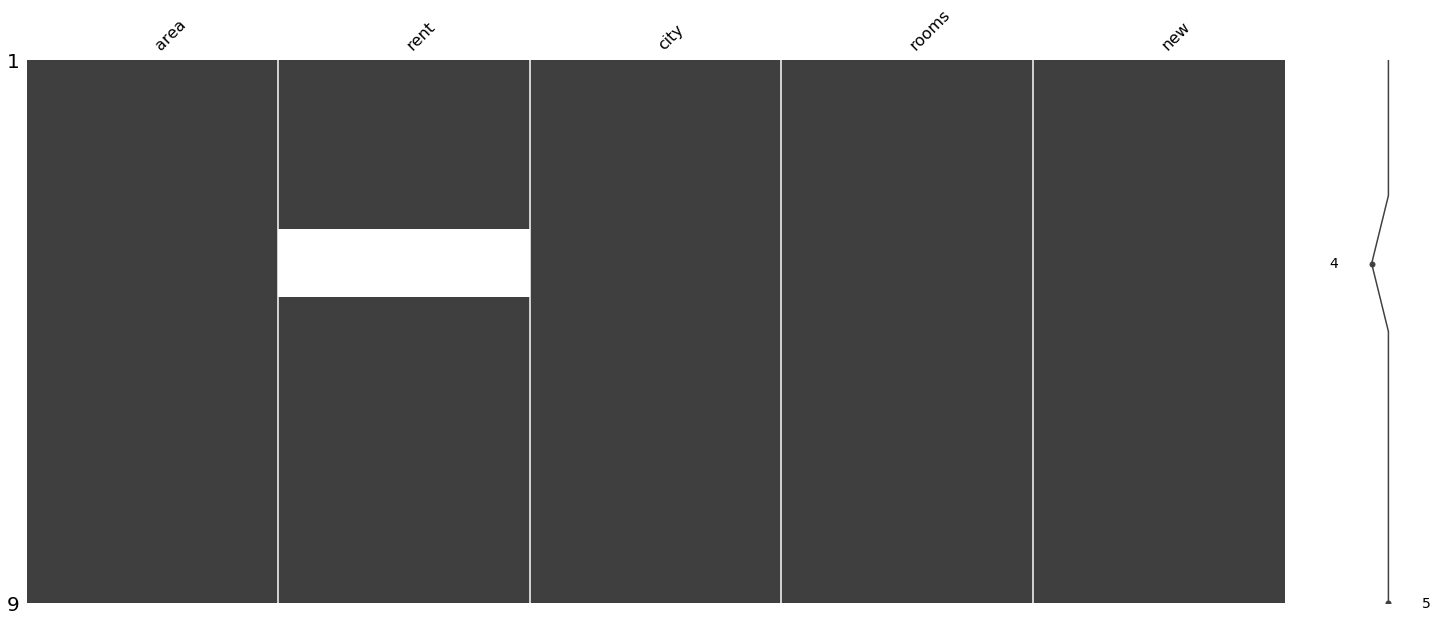

In [81]:
missingno.matrix(df)

In [84]:
NUM_FEATURES = ['rent']

In [85]:
num_imputer = SimpleImputer(strategy='median')

In [87]:
num_imputer.fit(df[NUM_FEATURES])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [88]:
num_imputer.transform(df[NUM_FEATURES])

array([[25000.],
       [40000.],
       [50000.],
       [37500.],
       [45000.],
       [25000.],
       [60000.],
       [35000.],
       [30000.]])

In [15]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.reshape:

get_dummies(data, prefix=None, prefix_sep='_', dummy_na=False, columns=None, sparse=False, drop_first=False, dtype=None)
    Convert categorical variable into dummy/indicator variables.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapping column names to prefixes.
    prefix_sep : str, default '_'
        If appending prefix, separator/delimiter to use. Or pass a
        list or dictionary as with `prefix`.
    dummy_na : bool, default False
        Add a column to indicate NaNs, if False NaNs are ignored.
    columns : list-like, default None
        Column names in the

In [8]:
help(pd.read_csv)

Help on function read_csv in module pandas.io.parsers:

read_csv(filepath_or_buffer: Union[str, pathlib.Path, IO[~AnyStr]], sep=',', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=0, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, cache_dates=True, iterator=False, chunksize=None, compression='infer', thousands=None, decimal=b'.', lineterminator=None, quotechar='"', quoting=0, doublequote=True, escapechar=None, comment=None, encoding=None, dialect=None, error_bad_lines=True, warn_bad_lines=True, delim_whitespace=False, low_memory=True, memory_map=False, float_precision=None)
    Read a comma-separated values (csv) file into Dat